In [1]:
# 导入相应的模块
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

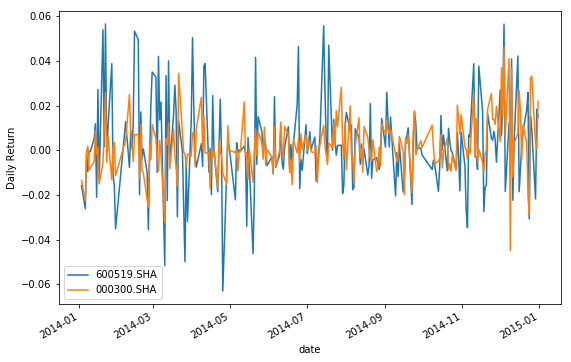

In [14]:
# 获取一段时间的股票数据
start_date = '2014-01-01'
end_date = '2015-01-01'
asset = D.history_data('600519.SHA',start_date,end_date,fields=['close']).set_index('date')['close']
benchmark = D.history_data('000300.SHA',start_date,end_date,fields=['close']).set_index('date')['close']
asset.name = '600519.SHA'
benchmark.name = '000300.SHA'

# 计算收益率
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

# 绘制
r_a.plot(figsize=[9,6])
r_b.plot()
plt.ylabel("Daily Return")
plt.legend()
plt.show()

In [15]:
X = r_b.values  
Y = r_a.values
x = sm.add_constant(X)
 
def linreg(x,y):
    # 增加一个常数项
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    # 再把常数项去掉
    x = x[:, 1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)
print('alpha: ' + str(alpha))
print('beta: ' + str(beta))

alpha: 0.0011625393905649976
beta: 0.6729346530041009


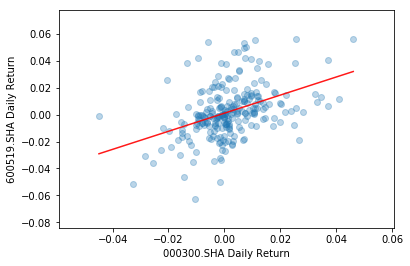

In [16]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.scatter(X, Y, alpha=0.3) # 画出原始数据散点
plt.xlabel("000300.SHA Daily Return")
plt.ylabel("600519.SHA Daily Return")

 # 增加一条红色的回归直线
plt.plot(X2, Y_hat, 'r', alpha=0.9);

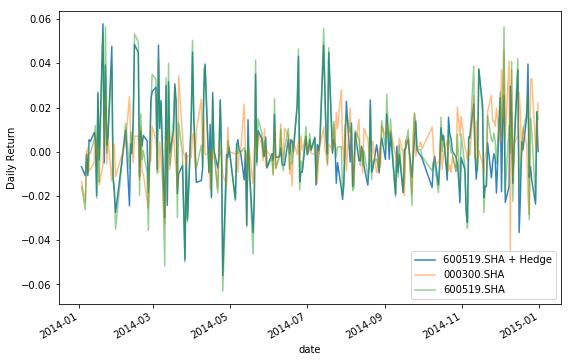

In [17]:
# 构建一个市场中性组合
portfolio = -1*beta*r_b + r_a
portfolio.name = "600519.SHA + Hedge"

# 绘制各自的收益曲线
portfolio.plot(alpha=0.9,figsize=[9,6])
r_b.plot(alpha=0.5);
r_a.plot(alpha=0.5);
plt.ylabel("Daily Return")
plt.legend();

In [18]:
print("means: ", portfolio.mean(), r_a.mean())
print("volatilities: ", portfolio.std(), r_a.std())

means:  0.0011625392362475395 0.002370904665440321
volatilities:  0.01785176992416382 0.019634943455457687


可以看出，我们以收益率为代价降低了波动，在降低风险的同时，收益也相应降低了。 接下来，我们来检查一下α是否与以前一样，而β已被消除

In [19]:
P = portfolio.values
alpha, beta = linreg(X,P)
print('alpha: ' + str(alpha))
print('beta: ' + str(beta))  # alpha 和以前仍然一样 beta 已经被消除,beta几乎为0

alpha: 0.0011625393770863877
beta: -1.2462353111281077e-09


请注意，我们使用历史数据构建了 市场中性策略。 我们可以通过在不同的时间框架内验证资产和对冲投资组合的α和β值来检查其是否仍然有效

In [26]:
# 得到过去一年得到的alpha 和beta值
start_date = '2014-01-01'
end_date = '2015-01-01'
asset = D.history_data('600519.SHA',start_date,end_date,fields=['close']).set_index('date')['close']
benchmark = D.history_data('000300.SHA',start_date,end_date,fields=['close']).set_index('date')['close']
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]
X = r_b.values
Y = r_a.values
historical_alpha, historical_beta = linreg(X,Y)
print('Asset Historical Estimate:')
print('alpha: ' + str(historical_alpha))
print('beta: ' + str(historical_beta))

# 获取下一年的数据:
start_date = '2015-01-01'
end_date = '2015-06-01'
asset = D.history_data('600519.SHA',start_date,end_date,fields=['close']).set_index('date')['close']
benchmark = D.history_data('000300.SHA',start_date,end_date,fields=['close']).set_index('date')['close']
asset.name = '600519.SHA'
benchmark.name = '000300.SHA'
# 重复前面的过程来计算alpha 和beta值
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]
X = r_b.values
Y = r_a.values
alpha, beta = linreg(X,Y)
print('Asset Out of Sample Estimate:')
print('alpha: ' + str(alpha))
print('beta: ' + str(beta))

# 构建对冲投资组合来计算alpha、beta
portfolio = -1*historical_beta*r_b + r_a
P = portfolio.values
alpha, beta = linreg(X,P)
print('Portfolio Out of Sample:')
print ('alpha: ' + str(alpha))
print ('beta: ' + str(beta))


Asset Historical Estimate:
alpha: 0.0011625393905649976
beta: 0.6729346530041009
Asset Out of Sample Estimate:
alpha: 0.00020366206079023354
beta: 0.8665529691034388
Portfolio Out of Sample:
alpha: 0.00020366200887901988
beta: 0.1936183130062783


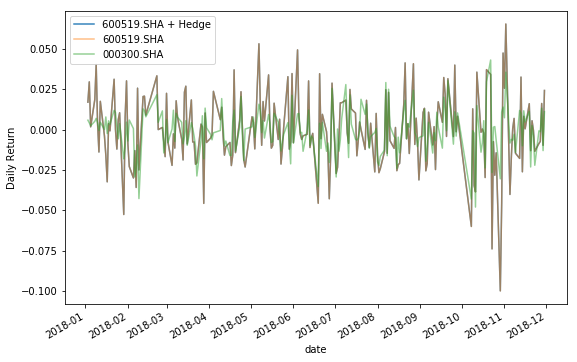

In [13]:
# 绘制图形
portfolio.name = "600519.SHA + Hedge"
portfolio.plot(alpha=0.9,figsize=[9,6])
r_a.plot(alpha=0.5);
r_b.plot(alpha=0.5)
plt.ylabel("Daily Return")
plt.legend();